In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
import ast
# Loading dataset
data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()
# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)
# Filtering Dataframe ON Data Analysts
DA_df = df[df['job_title_short'] == 'Data Analyst'].copy()


In [19]:
DF_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country'] == 'United States')].copy()
DF_DA_US = DF_DA_US.dropna(subset='salary_year_avg')

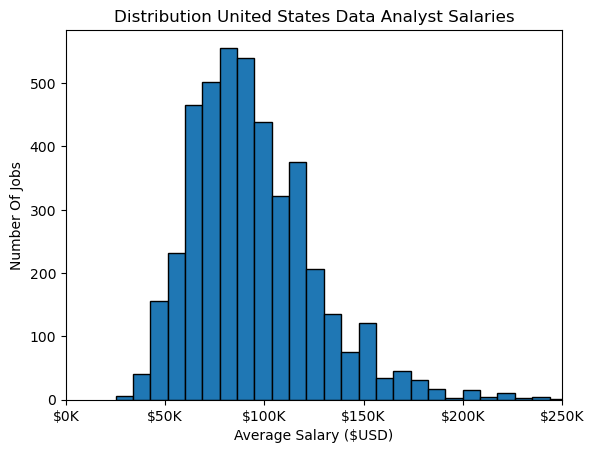

In [20]:
DF_DA_US['salary_year_avg'].plot(kind='hist',bins=40,edgecolor='Black')
plt.xlim(0,250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f"${int(x/1000)}K"))
plt.xlabel('Average Salary ($USD)')
plt.ylabel('Number Of Jobs')
plt.title('Distribution United States Data Analyst Salaries')
plt.show()